In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [10]:


consumer_key = "O0fmUZG1JmkcKdQDzsWEbVrdp"
consumer_secret = "IQ8b9GszOaD5qDEFHvzQR6GuWA4yQmMTei8sPnmhc3nPC6DApp"
access_token = "962996431211585537-s4bYtcZXlUjEtV4hQFFU6cAMMN0gBRz"
access_token_secret = "ZEV8h2mDB0biAQXUQ2vRcc2llYNsZVUIcR2RLrcjkU26m"


auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [11]:

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [13]:

def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [14]:

Topic=["Arsenal"]
get_tweets(Topic , Count=100)

In [15]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-02-24 12:06:46,AleeY_Mexico🇲🇽,False,@goal Against arsenal,0,0,kebbi nigeria
1,2021-02-24 12:06:45,rijaz aboobacker,False,@WelBeast Happy b'day... Hope ur birthday is a...,0,0,vatakara
2,2021-02-24 12:06:36,.,False,@errzilv5 @DervishLogan @AFCGUY18 @AFCMax9 @Ar...,0,0,
3,2021-02-24 12:06:36,Andrew,False,I can’t wait until he leaves us. This PR sesh ...,0,0,"Barnet, London"
4,2021-02-24 12:06:34,Steve Proud,False,@kel14bt Looking great Kellie,0,0,North Hertfordshire
5,2021-02-24 12:06:32,Stormy,False,@tomwilkinson84 @TheAthleticUK @David_Ornstein...,0,0,France
6,2021-02-24 12:06:29,J 👑,False,Dfkm did people miss the statement where stan ...,0,0,SE18
7,2021-02-24 12:06:28,Leathers 💙,False,@CharlieD14mond @CallumsssB @MaynAFC @RJPJourn...,0,0,


# Analyze the tweets

In [16]:


import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [17]:
# Funciton to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [18]:

def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) 
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new


In [19]:


df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2021-02-24 12:06:46,AleeY_Mexico🇲🇽,False,@goal Against arsenal,0,0,kebbi nigeria,against arsenal
1,2021-02-24 12:06:45,rijaz aboobacker,False,@WelBeast Happy b'day... Hope ur birthday is a...,0,0,vatakara,happy b day hope ur birthday is as good as ars...
2,2021-02-24 12:06:36,.,False,@errzilv5 @DervishLogan @AFCGUY18 @AFCMax9 @Ar...,0,0,,that stat isnt the be all and end all as much ...
3,2021-02-24 12:06:36,Andrew,False,I can’t wait until he leaves us. This PR sesh ...,0,0,"Barnet, London",i can t wait until he leaves us this pr sesh w...
4,2021-02-24 12:06:34,Steve Proud,False,@kel14bt Looking great Kellie,0,0,North Hertfordshire,looking great kellie


In [20]:


df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2021-02-24 12:06:46,AleeY_Mexico🇲🇽,False,@goal Against arsenal,0,0,kebbi nigeria,against arsenal,Neutral
1,2021-02-24 12:06:45,rijaz aboobacker,False,@WelBeast Happy b'day... Hope ur birthday is a...,0,0,vatakara,happy b day hope ur birthday is as good as ars...,Positive
2,2021-02-24 12:06:36,.,False,@errzilv5 @DervishLogan @AFCGUY18 @AFCMax9 @Ar...,0,0,,that stat isnt the be all and end all as much ...,Negative
3,2021-02-24 12:06:36,Andrew,False,I can’t wait until he leaves us. This PR sesh ...,0,0,"Barnet, London",i can t wait until he leaves us this pr sesh w...,Neutral
4,2021-02-24 12:06:34,Steve Proud,False,@kel14bt Looking great Kellie,0,0,North Hertfordshire,looking great kellie,Positive


In [21]:
# Check Summary of Random Record
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 Xhaka: Social media abusers not real Arsenal fans 

 #pl #epl

https://t.co/YX7Nd5TBdy

Clean tweet:
 xhaka social media abusers not real arsenal fans pl epl

Sentiment of the tweet:
 Negative


In [22]:
# Overall Summary

print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Arsenal'] are : 101
Total Positive Tweets are : 38
Total Negative Tweets are : 23
Total Neutral Tweets are : 40


In [23]:
df["Sentiment"].value_counts()

Neutral     40
Positive    38
Negative    23
Name: Sentiment, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

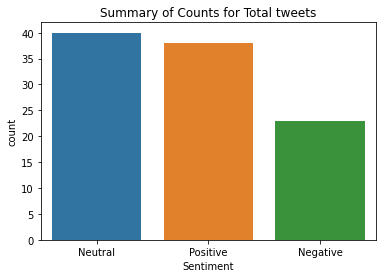

In [24]:

sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")


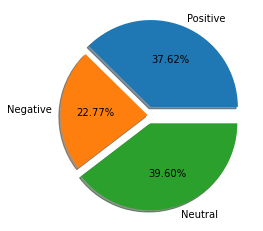

In [25]:
# Piechart 
#string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

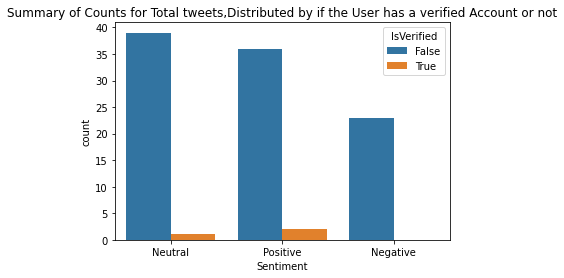

In [26]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

# Generate WordCloud

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

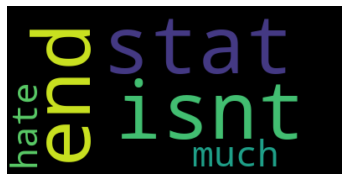

In [29]:


text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- **WordCloud for whole data(Topic not included in WordCloud)**

There are 6744 words in the combination of all review.


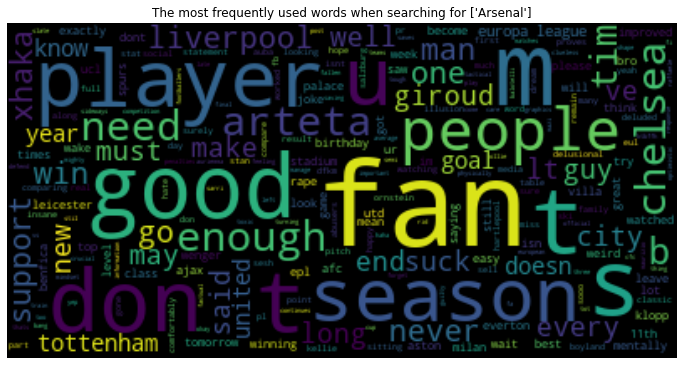

In [30]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

## NEW

- **Wordcloud for Positive tweets only (Topic not included in WordCloud)**

There are 6744 words in the combination of all review.


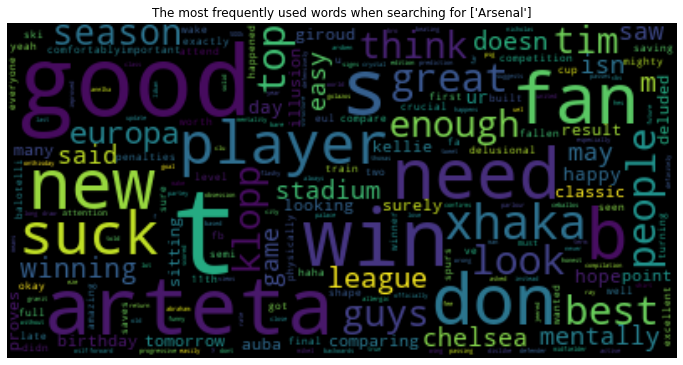

In [31]:
# Combine POSITIVE reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

- **Wordcloud for Negative tweets only  (Topic not included in WordCloud)**

There are 6744 words in the combination of all review.


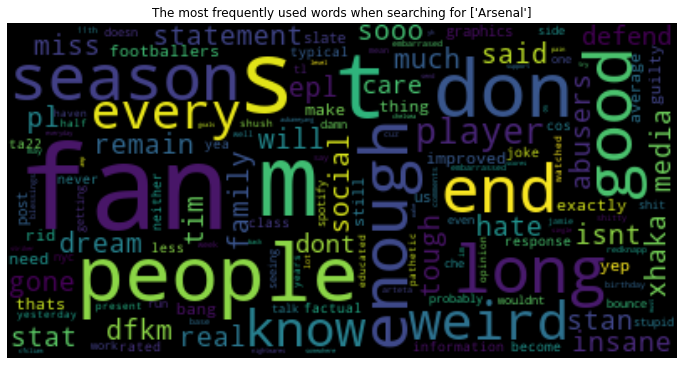

In [32]:
# Combine Negative reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

# Import image in streamlit.

import streamlit as st
from PIL import Image
import os
os.chdir("F:/Machine Learning/AI ML/Case Studies/Flask/TwitterFromScratch")
image = Image.open('Logo.jpg')
st.image(image, caption='Sunrise by the mountains',use_column_width=True)
st.pyplot()